## IMPORTS

In [1]:
#DATA PROCESSING
import pandas as pd
import numpy as np

#DATA EXPLORATION
import seaborn as sns
import matplotlib.pyplot as mp
%pip install association-metrics
import association_metrics as am
import statsmodels.api as sm
from statsmodels.formula.api import ols

#DATA MODELING
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## DATA PRE-PROCESSING

#### Load data

In [2]:
file = r'EP.xls'
data= pd.read_excel(file)
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


#### Understand data types

In [3]:
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [4]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [5]:
data.describe(include=['O'])

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [6]:
cat_col = ['Gender','EducationBackground',
           'MaritalStatus','EmpDepartment','EmpJobRole',
           'BusinessTravelFrequency','OverTime','Attrition']

In [7]:
num_cols = ['Age','DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','PerformanceRating']

#### Check for null values

In [8]:
data.isna().values.any()

False

In [9]:
data.isnull().values.any()

False

In [10]:
data = data.drop(["EmpNumber"], axis = 1)

### Results:
- There are 19 numerical columns
- There are 9 Categorical columns
- There is no null values in the data set

## DATA EXPLORATION

#### Data distribution

Text(0.5, 1.0, 'EmpLastSalaryHikePercent')

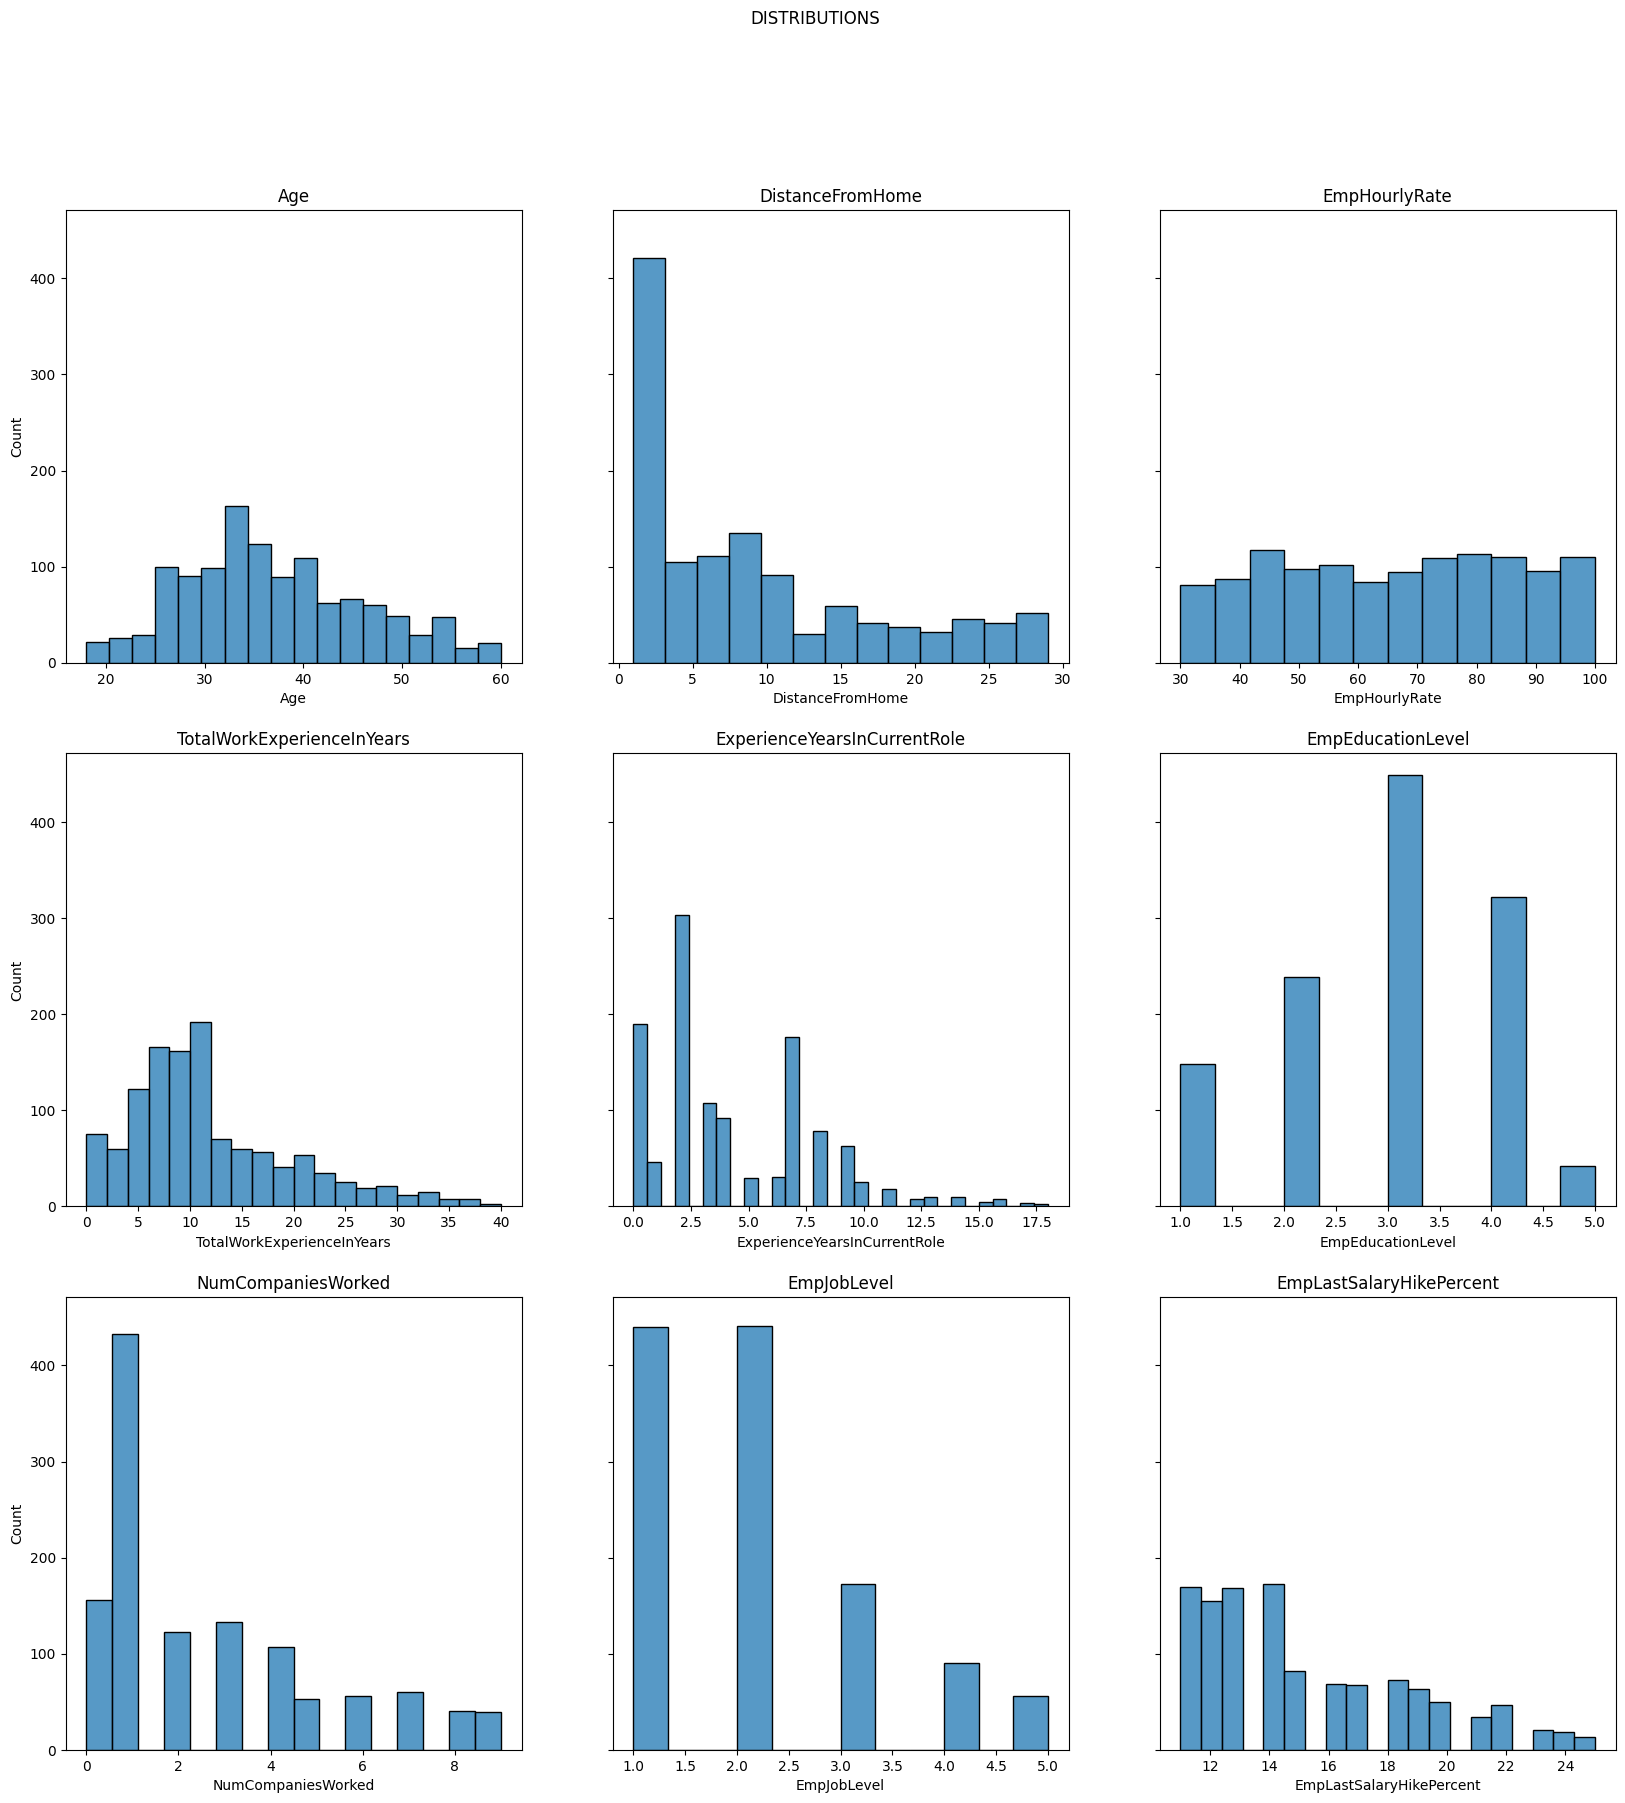

In [11]:
fig, axes = mp.subplots(3, 3, figsize=(20, 20), sharey=True)
fig.suptitle('DISTRIBUTIONS')

# Age
sns.histplot(ax=axes[0,0], x=data['Age'])
axes[0,0].set_title('Age')

# DistanceFromHome
sns.histplot(ax=axes[0,1], x=data['DistanceFromHome'])
axes[0,1].set_title('DistanceFromHome')

# EmpHourlyRate
sns.histplot(ax=axes[0,2], x=data['EmpHourlyRate'])
axes[0,2].set_title('EmpHourlyRate')

# TotalWorkExperienceInYears
sns.histplot(ax=axes[1,0], x=data['TotalWorkExperienceInYears'], bins = 20)
axes[1,0].set_title('TotalWorkExperienceInYears')

# ExperienceYearsInCurrentRole
sns.histplot(ax=axes[1,1], x=data['ExperienceYearsInCurrentRole'], bins = 30)
axes[1,1].set_title('ExperienceYearsInCurrentRole')

# EmpEducationLevel
sns.histplot(ax=axes[1,2], x=data['EmpEducationLevel'])
axes[1,2].set_title('EmpEducationLevel')

# NumCompaniesWorked
sns.histplot(ax=axes[2,0], x=data['NumCompaniesWorked'])
axes[2,0].set_title('NumCompaniesWorked')

#EmpJobLevel
sns.histplot(ax=axes[2,1], x=data['EmpJobLevel'])
axes[2,1].set_title('EmpJobLevel')

# EmpLastSalaryHikePercent
sns.histplot(ax=axes[2,2], x=data['EmpLastSalaryHikePercent'],bins=20)
axes[2,2].set_title('EmpLastSalaryHikePercent')


### RESULTS
- Most employees stay in a distance of 0-5 miles
- Work experience of most employees in 5-12 years
- Most employees have an experience of 0 or 2 years in current role
- Employee education level is 3 for majority employees
- Most employees have worked in atleast 1 company
- Most employees have salary hike of 11-15%

In [12]:
for s in cat_col:
    print(data[s].value_counts())

Gender
Male      725
Female    475
Name: count, dtype: int64
EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64
MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64
EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64
EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
D

C:\Users\hp\AppData\Local\Temp\ipykernel_2700\1764132619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=s, kind="count", palette="ch:.25", data=data)
C:\Users\hp\AppData\Local\Temp\ipykernel_2700\1764132619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=s, kind="count", palette="ch:.25", data=data)
C:\Users\hp\AppData\Local\Temp\ipykernel_2700\1764132619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=s, kind="count", palette="ch:.25", data=data)
C:\Users\hp\AppData\Local\Temp\ipykernel_2700\1764132619.py:2: FutureWarning

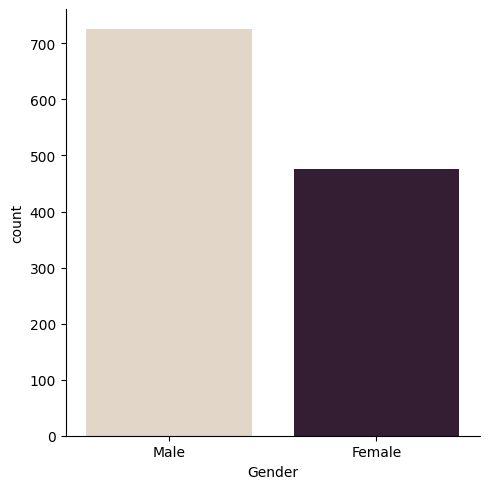

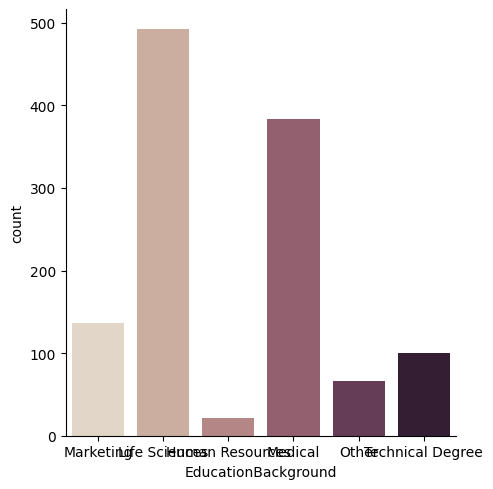

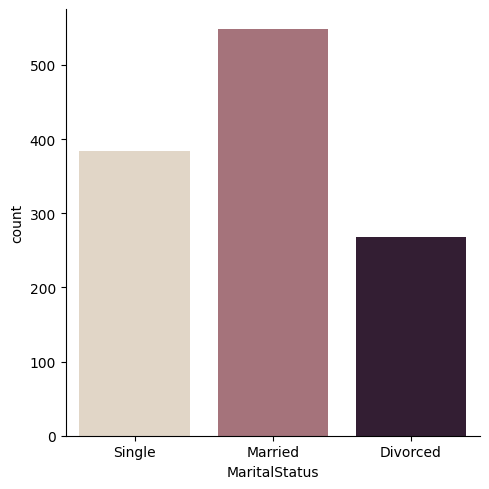

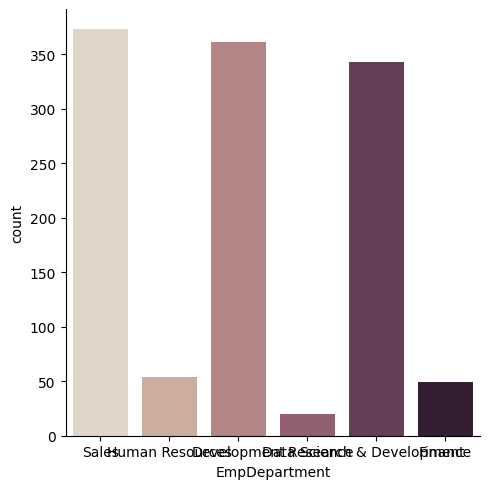

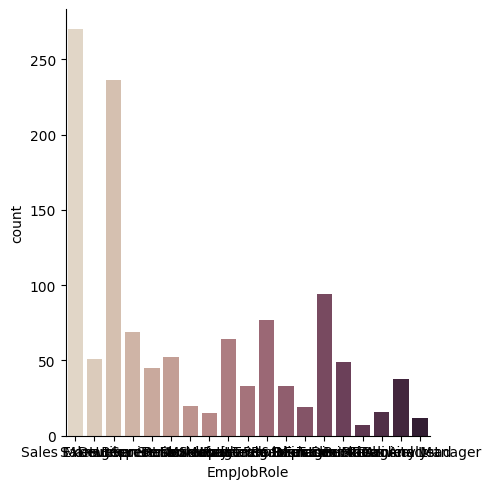

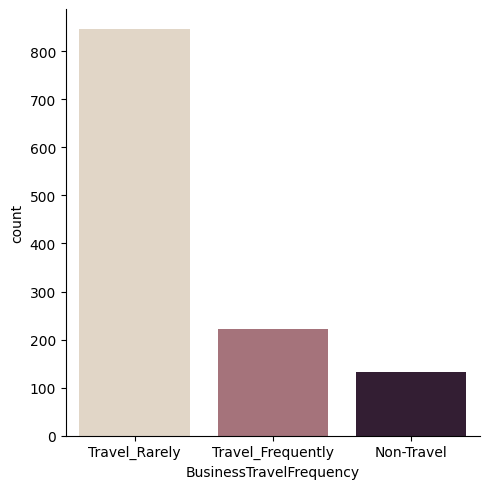

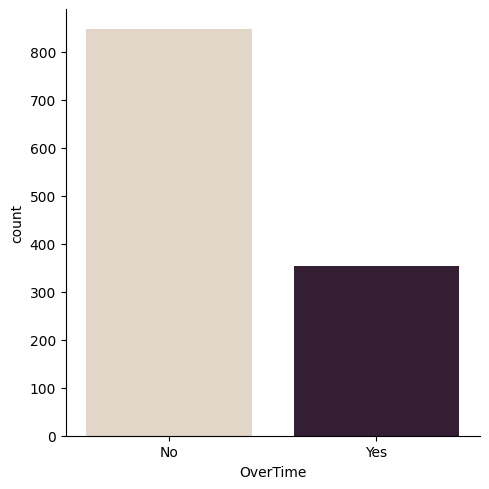

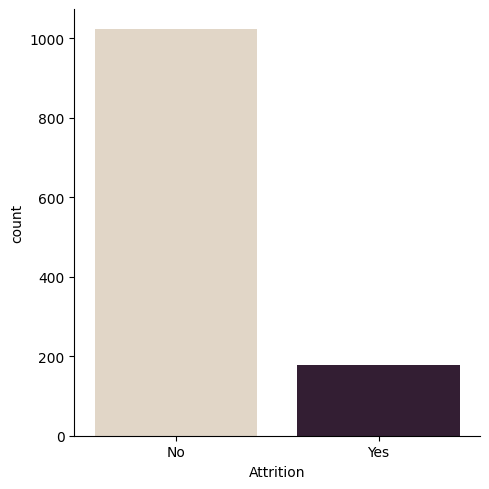

In [13]:
for s in cat_col:
    sns.catplot(x=s, kind="count", palette="ch:.25", data=data)

### RESULTS
- There are more male employees than female 
- Most employees have educational background as life sciences or medical.
- This is suprprising considering most employees are in either Sales or Dev.

#### Corelation of numerical features

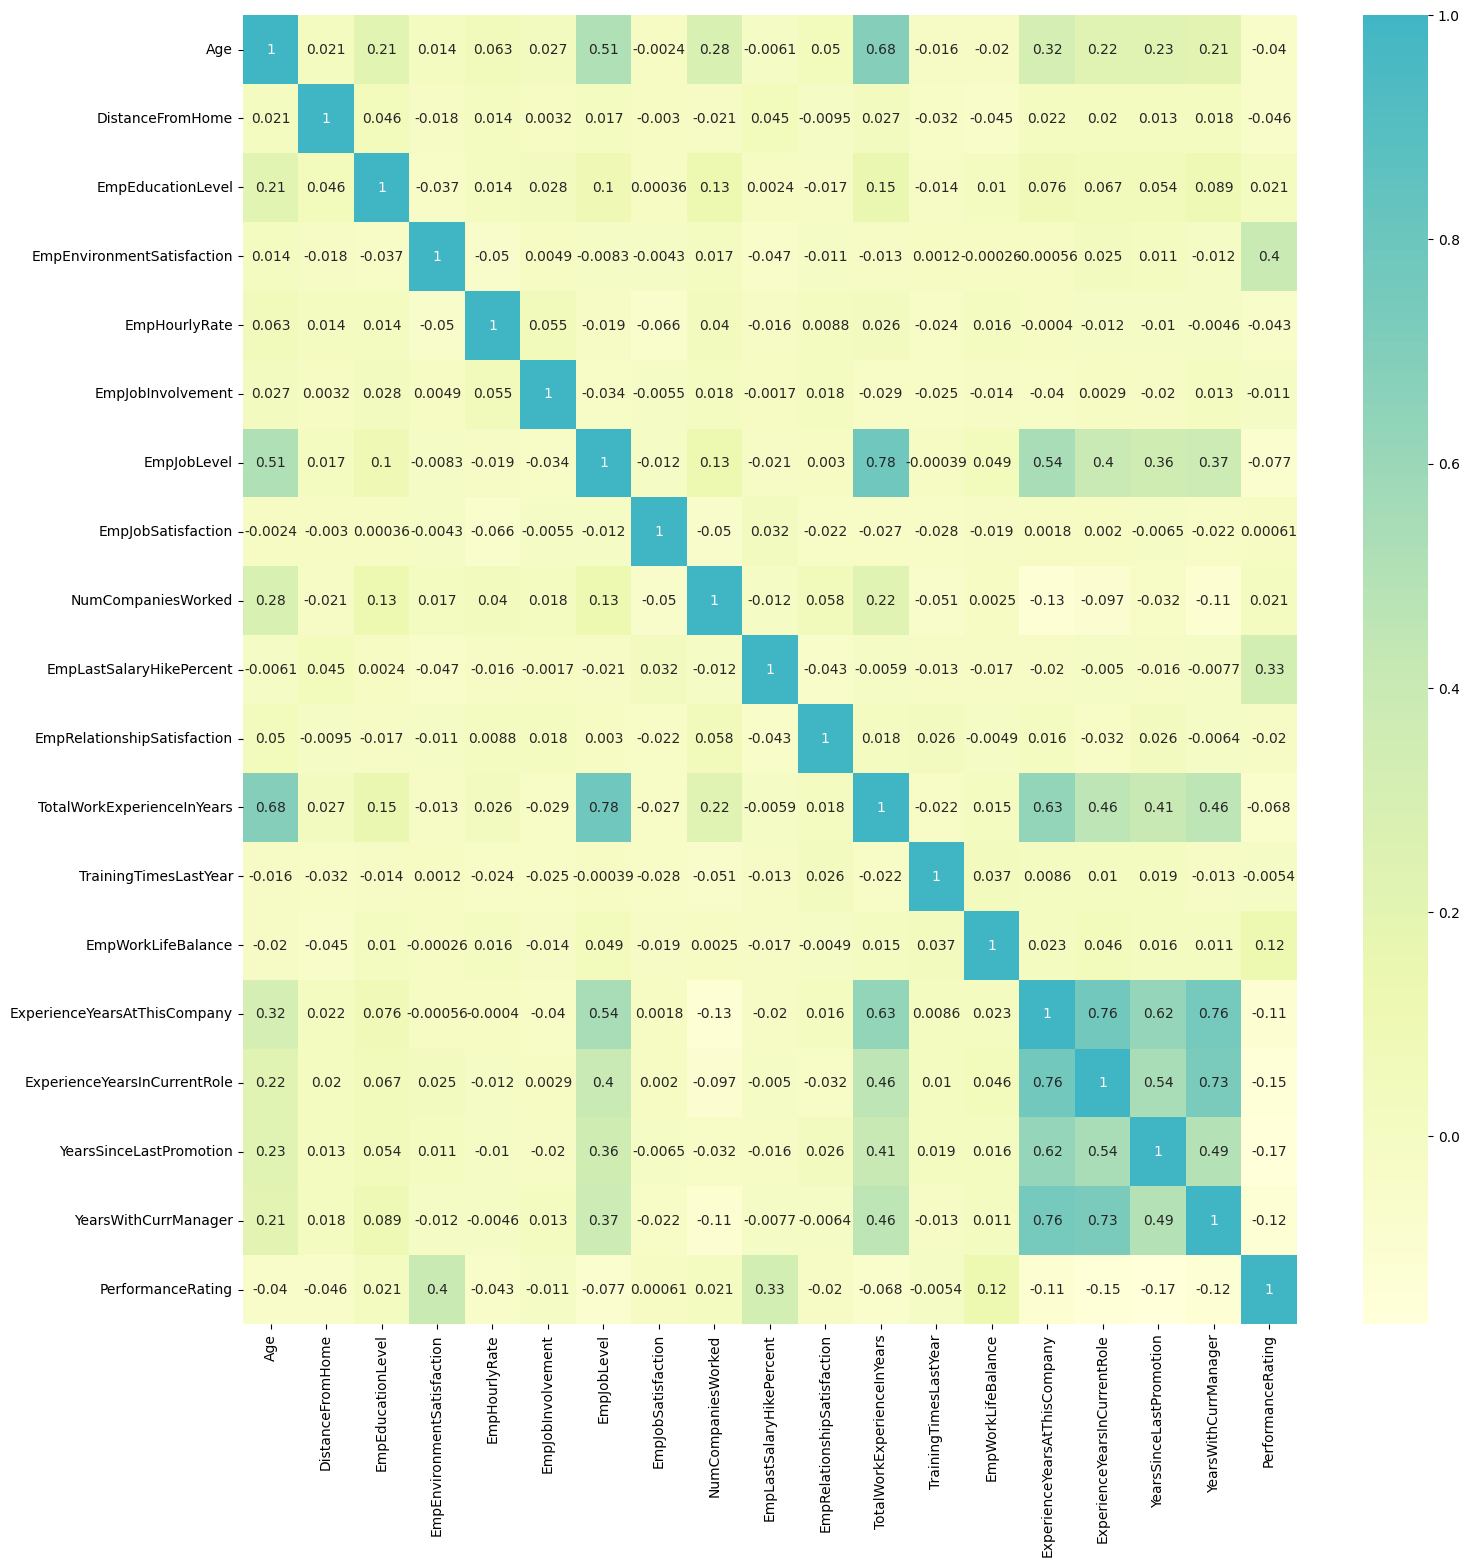

In [14]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
fig, ax = mp.subplots(figsize=(17,17))  
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True, ax=ax , center = 1)
mp.show(dataplot)

### RESULTS:
- Total work experience is related to Age, Employee job level, experience at this company, Experience at this role, Years since last promotion, years with current manager. It is slightly related to number of companies worked and education level. All of this makes sense logically too.


- Age corelates to employee job level, education level and all other factors that relate to total work experience. Again, makes total sense.


- Experience at this company, Experience at this role, Years since last promotion, years with current manager are highly corelated to eah other.


- Performance rating is affected by EmpEnvSatisfaction, EmpLastSalary and EmpWorkLifeBalance majorly. It is negatively related to experience at this company, Experience at this role, Years since last promotion, years with current manager. That means, increase in any of these can lead to reduced performance.

#### Corelation of categorical features

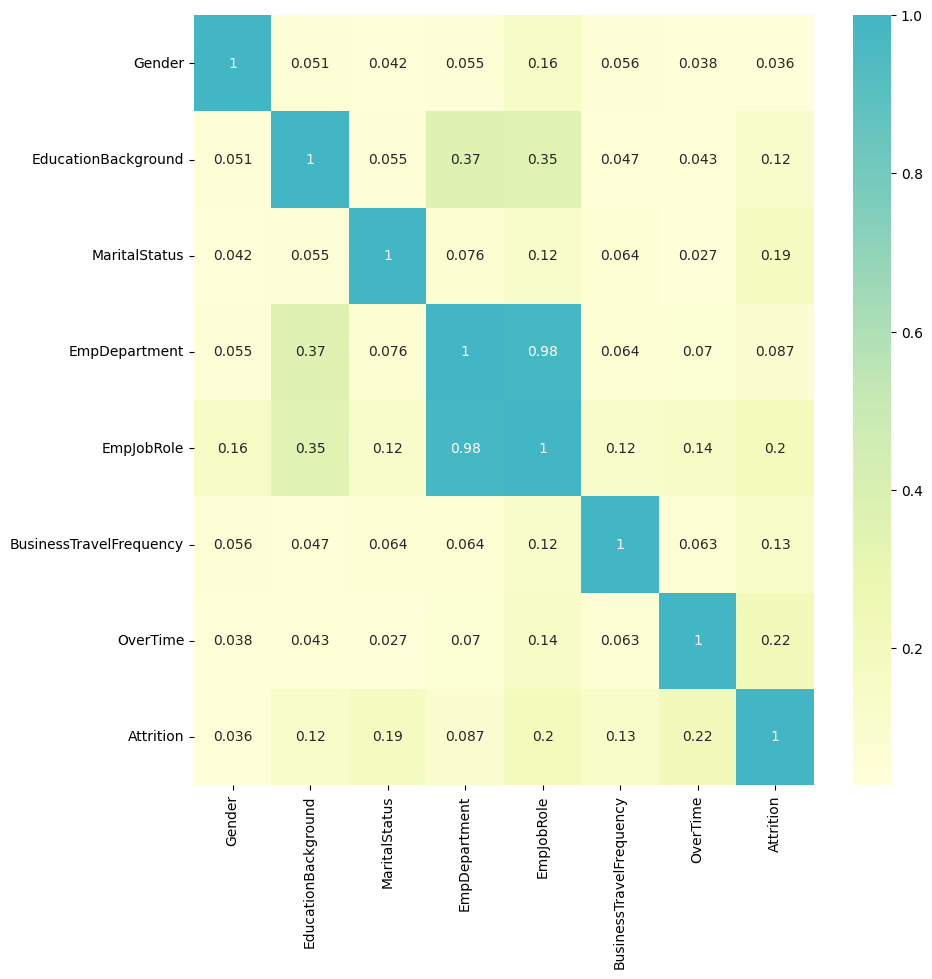

In [15]:
# Convert you str columns to Category columns
data = data.apply(lambda x: x.astype("category") if x.dtype == "O" else x)
# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(data) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
catcorr = cramersv.fit()
fig, ax = mp.subplots(figsize=(10,10))  
dataplot = sns.heatmap(catcorr, cmap="YlGnBu", annot=True, ax=ax , center = 1)
mp.show(dataplot)

### RESULTS:
- Employee job role is highly corelated to employee department. This can be attributed to job role being a subset of dept.


- Employee job role is also related to education background, gender, marital status, Business travel frequency, overtime and attrition.


- Employee dept is corelated to education and job role. This is because department needs employees based on education and thei job roles.


- Attrition is related to overtime, emp job role, marital status, business travel frequency, educational background.

#### Corelation of categorical with numerical features

In [16]:
#Correlation of Attrition with numerical features
p_score_dict = {}
f_score_dict = {}
for s in num_cols:
    model = ols(f'{s} ~ Attrition', data=data).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    p_score_dict[s]=(anova["PR(>F)"][0])
    f_score_dict[s]=(anova["F"][0])

p_score_dict

{'Age': 3.8128731316464807e-11,
 'DistanceFromHome': 0.028461334164950152,
 'EmpEducationLevel': 0.08898672042465726,
 'EmpEnvironmentSatisfaction': 1.7884937137597487e-05,
 'EmpHourlyRate': 0.3624416552368084,
 'EmpJobInvolvement': 9.36567451266129e-08,
 'EmpJobLevel': 8.78598461748436e-10,
 'EmpJobSatisfaction': 0.0045847128693805505,
 'NumCompaniesWorked': 0.19254570800406667,
 'EmpLastSalaryHikePercent': 0.7437083983335873,
 'EmpRelationshipSatisfaction': 0.1980823038972636,
 'TotalWorkExperienceInYears': 1.0078513430234554e-10,
 'TrainingTimesLastYear': 0.22506264622089242,
 'EmpWorkLifeBalance': 0.017428660437657756,
 'ExperienceYearsAtThisCompany': 7.234043500853356e-07,
 'ExperienceYearsInCurrentRole': 1.3286839090574763e-09,
 'YearsSinceLastPromotion': 0.04759173202270409,
 'YearsWithCurrManager': 3.2310233325205007e-08,
 'PerformanceRating': 0.16830279418099106}

In [17]:
#Corelation of performance rating with categorical features
model = ols('PerformanceRating ~ Gender + EducationBackground + MaritalStatus + EmpDepartment + EmpJobRole + BusinessTravelFrequency + OverTime + Attrition', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Gender,0.003154,1.0,0.012099,9.124321e-01
EducationBackground,1.468638,5.0,1.126658,3.442255e-01
MaritalStatus,1.118090,2.0,2.144343,1.176063e-01
EmpDepartment,63.638977,5.0,48.820314,5.724614e-46
EmpJobRole,118.918310,18.0,25.340991,3.534049e-71
BusinessTravelFrequency,0.425326,2.0,0.815718,4.425739e-01
OverTime,0.971469,1.0,3.726288,5.380437e-02
Attrition,1.112345,1.0,4.266649,3.908787e-02
Residual,304.245020,1167.0,NaN,NaN


#### RESULTS:
- Attrition is strongly dependant on Age, EmpEnvironmentSatisfaction, EmpJobInvolvement, EmpJobLevel,  TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsWithCurrManager.


- it is weakly related to OverTime, EmpJobSatisfaction, EmpWorkLifeBalance, YearsSinceLastPromotion.


- Performance rating is highly corelated to employee department and their job role, and overtime.

In [18]:
# Attrition correlated columns - ['EducationBackground','MaritalStatus','BusinessTravelFrequency',
#                                 'EmpJobRole','OverTime','Age', 'EmpEnvironmentSatisfaction' ,'EmpJobInvolvement', 
#                                  'EmpJobLevel', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 
#                                 'ExperienceYearsInCurrentRole', 'YearsWithCurrManager']
# Performance correlated columns - ['EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent','EmpWorkLifeBalance',
#                                 'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
#                                 'ExperienceYearsAtThisCompany','OverTime','EmpDepartment','EmpJobRole']

## DATA ANALYSIS - Tableau

#### ATTRITION ANALYSIS
- Sales has the most attrition followed by Developement and HR (% in dept).
- Employees that travel rarely and are single tend to leave the company.
- Most employees that leave the job are between 20-35years. This can be said because they are more dynamic and eager to change jobs and understand the world.
- Lesser Emp Environment Satisfaction, Emp Job Involvement leads to attrition.
- Lesser work experience leads to attrition. Maybe because they want to change jobs and gain more experience.
- Job satisfaction of rating 3 saw most attrition (32% of total people who left)
- Technical and HR have the highest % of people in dept leaving
- Sales Rep(34%) has highest attrition in dept followed by Technical architect (28%)
- Attrition increases with increase in job level. Again, this points to younger people with lower job levels tend to switch companies faster.

#### ATTRITION ANALYSIS FOR HIGHEST PERFORMING EMPLOYEES
- Overtime leads to attrition. This makes sense logically.
- Developement has most attrition followed by R&D then Sales
- Single employees that traveled frequently had most attrition
- Job satisfaction of rating 1 saw most attrition (44% of total people who left)
- Business analyst and sales rep has highest attrition (33%) followed by research scientist (28%)

#### PERFORMANCE RATING ANALYSIS

- Development job has highest high rating performers followed by R&D
- It has highest avg performance rating of 3.08 followed by DS at 3.05
- It has highest % of 4 rated employees in depts


- Financial dept rating gone down with age
- Fiance also sees lowest performance rating


- Most people have rated job involvement as 3
- Dept wise, other than HR and sales, lower job involvement gave higher rating. This can mean that lesser involvement in project gave employees more time to make their work better. Whereas in HR and Sales, they can work better only with more involvement as their work requires interacting with people.


- More overtime leads to better performance rating in all except finance and development. This is because these two are very stressful jobs and overtime can reduce their performance.



- 20-25% salary hike leads to better performance
- In general women performce better 
- Environment satisfaction is directly correlated to performance. More satisfied the employee is over all, better is their performance.
-  There is direct and strong correlation between emp worklife balance and performance rating. Which makes sense, better the relationship satisfaction, better the performance. (1 being worst)



- Years since last promoted kind of has a U trend. Which can be becuase fresh promotions enhance performance and better performance in the later years because they want to get promoted. 
- As job level increases, performance rating decreases

## TRAIN MODEL

### Selecting columns to train. All columns where pearsons correlation value is > |0.1| and where p-value < 0.05 is considered

In [19]:
final_cols = ['EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent','EmpWorkLifeBalance',
              'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
              'ExperienceYearsAtThisCompany','EmpDepartment','OverTime','EmpJobRole']

In [20]:
df = data.copy()
labelEncoder = LabelEncoder()
category_col = ['EmpDepartment','OverTime','EmpJobRole']
mapping_dict = {}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
 
    le_name_mapping = dict(zip(labelEncoder.classes_,
                               labelEncoder.transform(labelEncoder.classes_)))
 
    mapping_dict[col] = le_name_mapping
print(mapping_dict)

{'EmpDepartment': {'Data Science': 0, 'Development': 1, 'Finance': 2, 'Human Resources': 3, 'Research & Development': 4, 'Sales': 5}, 'OverTime': {'No': 0, 'Yes': 1}, 'EmpJobRole': {'Business Analyst': 0, 'Data Scientist': 1, 'Delivery Manager': 2, 'Developer': 3, 'Finance Manager': 4, 'Healthcare Representative': 5, 'Human Resources': 6, 'Laboratory Technician': 7, 'Manager': 8, 'Manager R&D': 9, 'Manufacturing Director': 10, 'Research Director': 11, 'Research Scientist': 12, 'Sales Executive': 13, 'Sales Representative': 14, 'Senior Developer': 15, 'Senior Manager R&D': 16, 'Technical Architect': 17, 'Technical Lead': 18}}


In [21]:
def get_key_OverTime(val):
    for key, value in mapping_dict['OverTime'].items():
         if val == value:
                return key
            
def get_key_EmpDepartment(val):
    for key, value in mapping_dict['EmpDepartment'].items():
         if val == value:
                return key
            
def get_key_EmpJobRole(val):
    for key, value in mapping_dict['EmpJobRole'].items():
         if val == value:
                return key

In [22]:
# Make dependant variable dataframe
def prep_input(df):
    X = df[final_cols]
    #One hot encode categorical columns
    X = pd.get_dummies(X, ['EmpDepartment','OverTime','EmpJobRole'])
    return X

In [23]:
X = prep_input(data)

In [24]:
X.shape

(1200, 34)

In [25]:
#Label column
Y = data.loc[:,['PerformanceRating']]

### Split data into train and validation set then standardize it

In [26]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=10,stratify=Y)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pickle.dump(sc, open('sc.pkl', 'wb'))

### RANDOM FOREST CLASSIFIER MODEL

In [28]:
# Training the model
classifier_rfg=RandomForestClassifier(random_state=33, n_estimators=40)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A co

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=40, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

### Store the model as pickle file

In [29]:
pickle.dump(model_gridrf, open('model_gridrf', 'wb'))
#pickled_model = pickle.load(open('model_gridrf.pkl', 'rb'))

### Find best parameters

In [30]:
# Display the best parameters found by GridSearchCV for the Random Forest model
model_gridrf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 5}

### Predict the outcomes of test data

In [31]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [32]:
# Convert predictions to numpy array
y_predict_rf = np.array(y_predict_rf)

# Get unique predicted classes and their counts
unique, counts = np.unique(y_predict_rf, return_counts=True)

# Print unique classes and their counts
print(unique, counts)

[2 3 4] [ 50 220  30]


### Evaluate the predictions

In [33]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9533333333333334
              precision    recall  f1-score   support

           2       0.90      0.94      0.92        48
           3       0.97      0.97      0.97       219
           4       0.93      0.85      0.89        33

    accuracy                           0.95       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.95      0.95      0.95       300



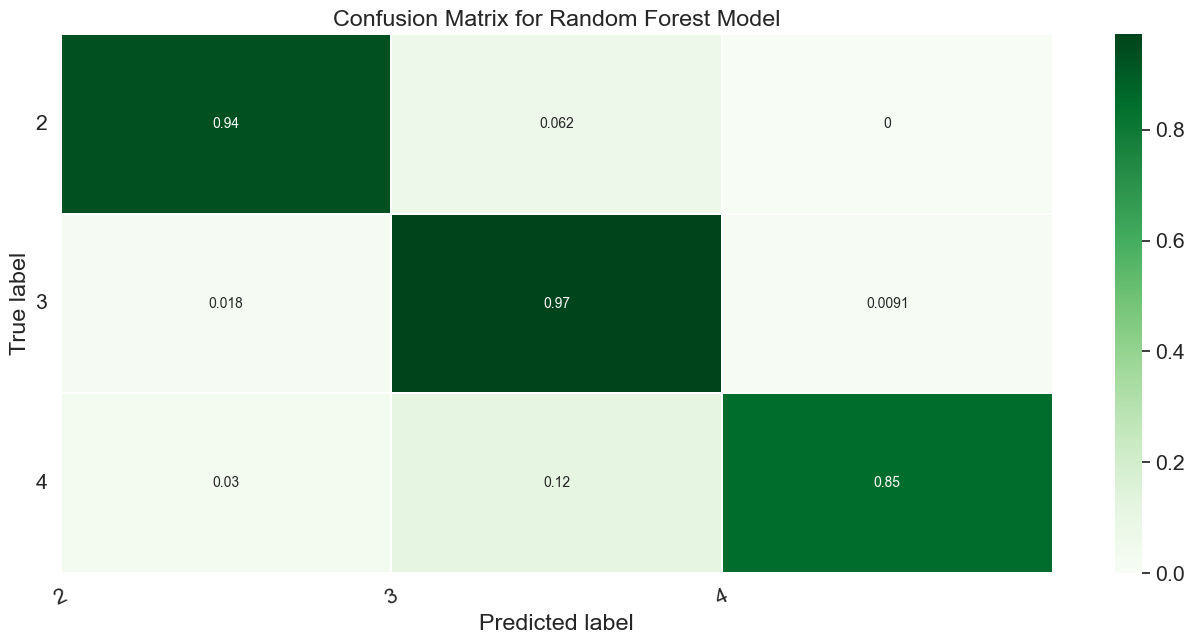

In [34]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_predict_rf)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
mp.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=mp.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['2','3','4']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
mp.xticks(tick_marks, class_names, rotation=25)
mp.yticks(tick_marks2, class_names, rotation=0)
mp.xlabel('Predicted label')
mp.ylabel('True label')
mp.title('Confusion Matrix for Random Forest Model')
mp.show()

### Predict an employee rating

In [35]:
# Predict the performance rating for a given employee record
def pred(l):
    data1 = data.copy()
    data1.loc[len(data1)] = l
    trial = prep_input(data1)
    trial = trial.iloc[[len(data1)-1]]
    # Use the trained model from this notebook (model_gridrf)
    y_predict_rf = model_gridrf.predict(trial)
    return y_predict_rf

l = list(data.iloc[5])
y_predict_rf = pred(l)
y_predict_rf[0]

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


4

In [36]:
data.iloc[5,-1]

4